# Preprocessing the Dataset by Deleting Missing Values

## Reading and Understanding the Data

In [1]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# load dataset

df = pd.read_csv('./housing_data.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
# the shape of our dataset

df.shape

(506, 14)

In [4]:
# info of our data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
# description of the data

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# checking the datatypes of the features

df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

## Data Cleaning

In [7]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [8]:
# turn all column names to small letters and replace spaces with underscores incase data is updated in the future to include spaces

df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

(506, 14)

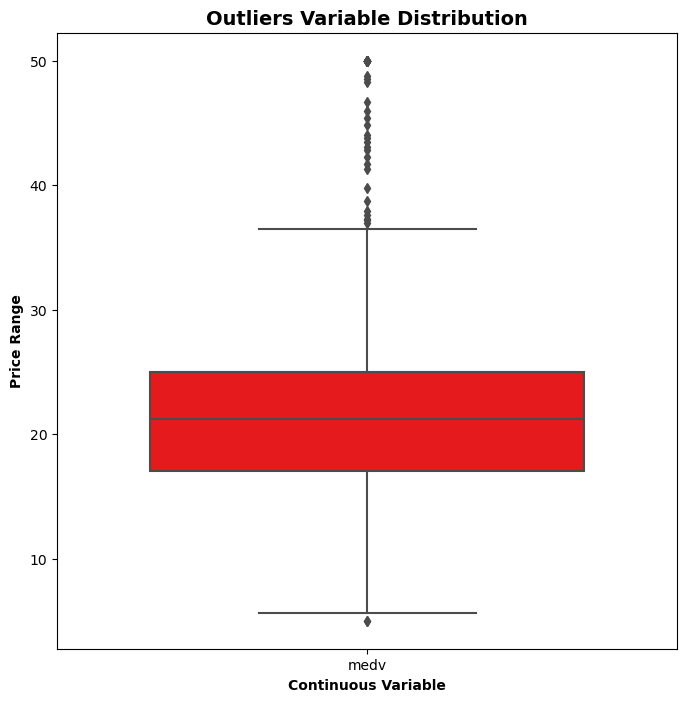

In [9]:
# Outlier Analysis of target variable with maximum amount of Inconsistency

outliers = ['medv']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data = df[outliers], orient = "v", palette = "Set1", whis=1.5, saturation = 1, width = 0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df.shape

#### insight

- House with a price range above $40,000 can be seen as outliers

## Data Visualization

We want to check for:
- Price distribution
- the correlation between
    - independent features: if there is a high correlation between independent features, one of the independent feature can be removed to avoid colinearity (if the features are very highly correlated by 95 or 96% or -0.95, we can drop one of the features and take the other). `tax` and `rad` seem to be highly correlated at about 91%.
    - independent features and dependent/output

We can use regression plot `regplot` from seaborn to see how each independent variable correlates with the `medv`.

### Visualizing the Price Distribution

c:\Users\DELL\anaconda3\envs\boston_house_pricing\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


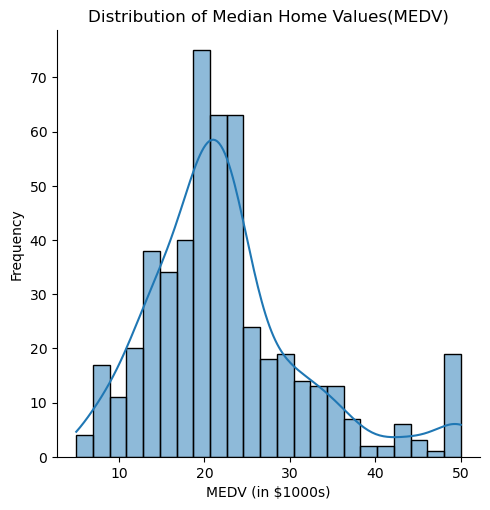

In [10]:
# plt.figure(figsize=(10,6))
sns.displot(df.medv, kde=True)
plt.title("Distribution of Median Home Values(MEDV)")
plt.xlabel("MEDV (in $1000s)")
plt.ylabel("Frequency")
plt.show()

We seem to have a normal distribution with a little right skew showing that most of the house prices seem to be below $40,000. Since we have a normal distribution, we can use the default pearson correlation to find the correlation between the features and how they correlate with the target variable, `medv`.

In [11]:
# General Correlation 
df.corr() # pearson correlation method

# other methods of corrlation
# df.corr(method='spearman')
# df.corr(method='kendall')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
zn,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
indus,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
chas,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
nox,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
rm,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
age,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
dis,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
rad,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
tax,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


We observe that `rad` and `tax` seem to be highly correlated at about 91%. We will be dropping `rad`. WHY? - How do we know which one to drop.

### Visualizing the Relationship Between the Price Variable and other Variables Without Missing Values

Text(0.5, 1.0, 'Visual Corr Between nox and medv')

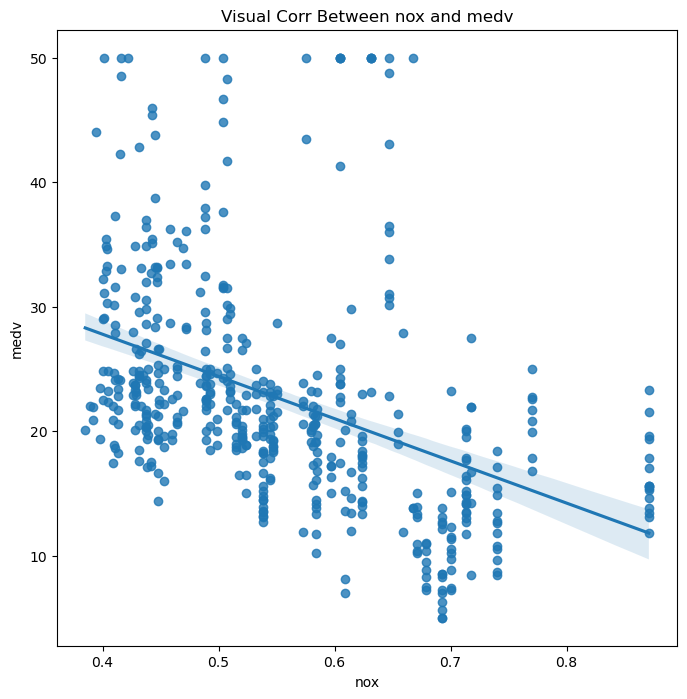

In [12]:
# corr between nox and medv
sns.regplot(x = "nox", y = "medv", data = df)
plt.title("Visual Corr Between nox and medv")

We can see that as nox: Nitric oxides concentration (parts per 10 million) increases, the price, `medv` decreases and vice versa as nox decreases, price increases showing a negative correlation.

Text(0.5, 1.0, 'Visual Corr Between rm and medv')

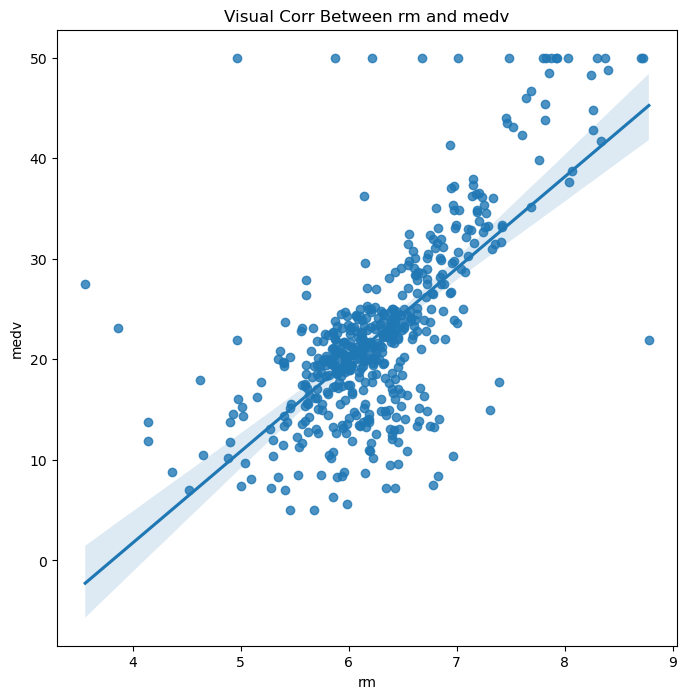

In [13]:
# corr between nox and medv
sns.regplot(x = "rm", y = "medv", data = df)
plt.title("Visual Corr Between rm and medv")

The graph shows that as RM: Average number of rooms per dwelling `increases`, the price(`mdev`) `increases` showing a positive correlation. It can also be observed that the increase is a really sharp one - it can be deduced that `rm` is a very important feature in ths dataset.

Text(0.5, 1.0, 'Visual Corr Between dis and medv')

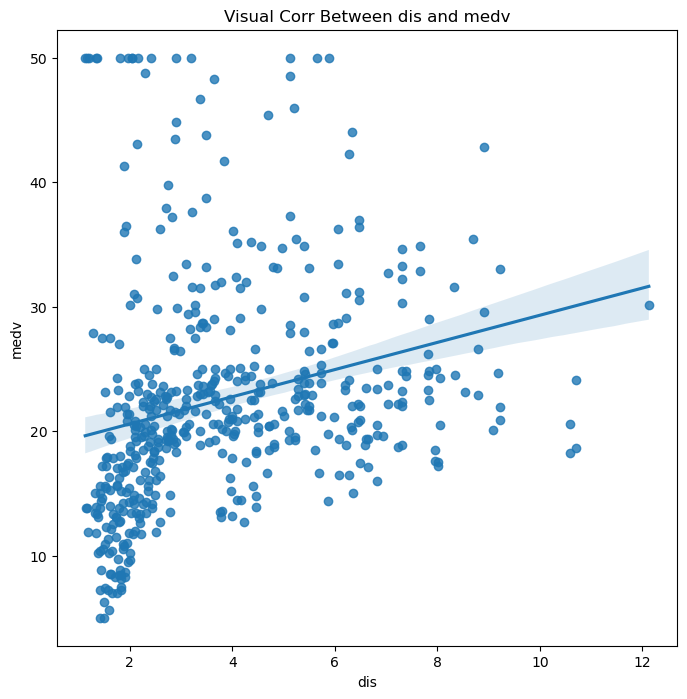

In [14]:
# corr between nox and medv
sns.regplot(x = "dis", y = "medv", data = df)
plt.title("Visual Corr Between dis and medv")

As DIS: Weighted distances to five Boston employment centers increases, there is a relatively slight increase in price

Text(0.5, 1.0, 'Visual Corr Between rad and medv')

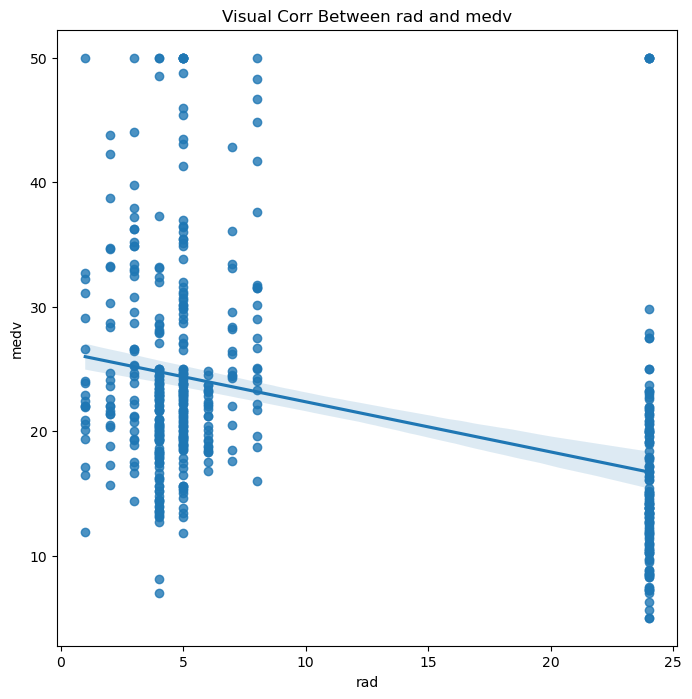

In [15]:
# corr between nox and medv
sns.regplot(x = "rad", y = "medv", data = df)
plt.title("Visual Corr Between rad and medv")

Get the interpretation later

Text(0.5, 1.0, 'Visual Corr Between tax and medv')

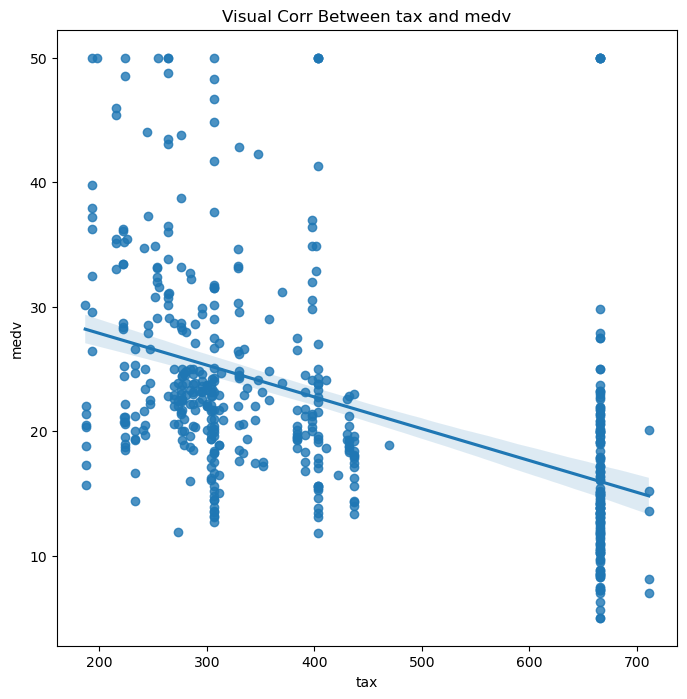

In [16]:
# corr between nox and medv
sns.regplot(x = "tax", y = "medv", data = df)
plt.title("Visual Corr Between tax and medv")

As TAX: Full-value property tax rate per 10k `increases`, there's a gentle decrease in price.

Text(0.5, 1.0, 'Visual Corr Between ptratio and medv')

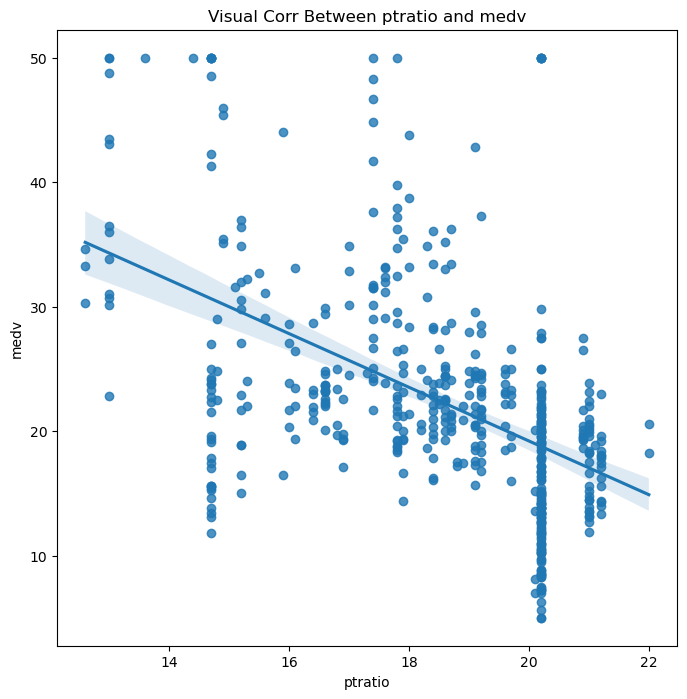

In [17]:
# corr between nox and medv
sns.regplot(x = "ptratio", y = "medv", data = df)
plt.title("Visual Corr Between ptratio and medv")

As PTRATIO: Pupil-teacher ratio by town increases, price decreases also

Text(0.5, 1.0, 'Visual Corr Between b and medv')

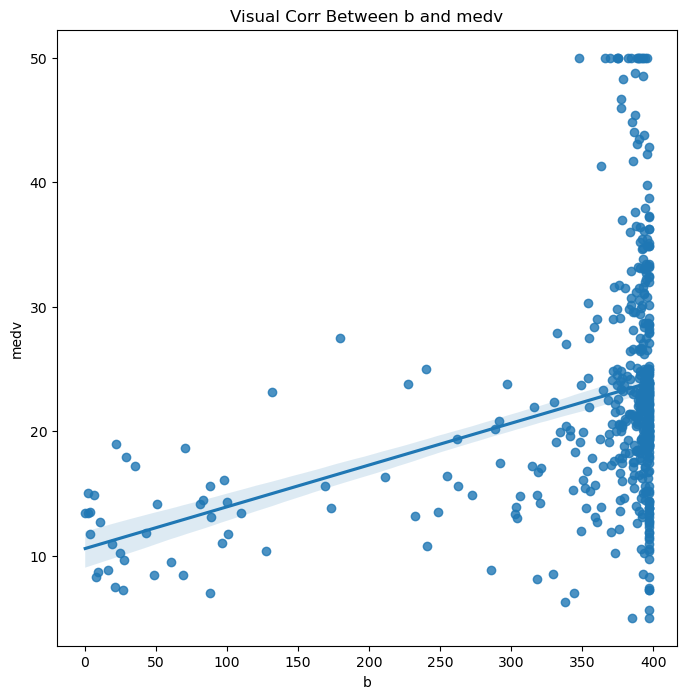

In [18]:
# corr between nox and medv
sns.regplot(x = "b", y = "medv", data = df)
plt.title("Visual Corr Between b and medv")

Interesting graph

In [19]:
# drop rad column
df = df.drop("rad", axis=1)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222,18.7,396.90,NaN,36.2


In [20]:
# make a copy of our new dataset
df_drop_rad = df.copy()
df_drop_rad.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222,18.7,396.90,NaN,36.2


In [21]:
# save the modified dataset to a csv file to be used for model building
df_drop_rad.to_csv('df_adjusted_col_dataset.csv', index=False)

## Handling Missing Values

It is observed that columns, `crim`, `zn`, `indus`, `chas`, `age` and `lstat` have 20 missing values each. We will be deleting the columns with the missing values for this notebook.

We will be handling the missing value by:
1. dropping the columns with the missing values
2. dropping the rows with the missing values
3. replacing missing values with 0
4. replacing missing values with mean from each column

In [22]:
# 1. dropping the columns with the missing values

# copy the dataset
df_col_del = df_drop_rad.copy()

df_col_del = df_col_del.dropna(axis = 'columns')

# creating a copy of the dataset with deleted column
df_col_del_dataset = df_col_del.to_csv("./model_with_deleted_mv/deleted_mv_dataset_columns.csv", index=False)

In [23]:
# 2. dropping the rows with the missing values

# copy the dataset
df_row_del = df_drop_rad.copy()

df_row_del = df_row_del.dropna(axis = 0)

# creating a copy of the dataset with deleted row
df_row_del_dataset = df_row_del.to_csv("./model_with_deleted_mv_row/df_row_del_dataset.csv", index=False)

In [24]:
# list of columns to fill
columns_to_fill = ["crim", "zn", "indus", "chas", "age", "lstat"]

In [33]:
# 3. replacing missing values with 0

# copy the dataset
df_replace_zero = df_drop_rad.copy()

# df_replace_zero = df_replace_zero.fillna(0.00)
# df_replace_zero.isnull().sum()

df_replace_zero[columns_to_fill] = df_replace_zero[columns_to_fill].fillna(0.00)

# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
# display(df_replace_zero)

# creating a copy of the dataset with deleted row
df_replace_zero_dataset = df_replace_zero.to_csv("./model_with_mv_zeros/df_replace_zero_dataset.csv", index=False)

In [35]:
# 4. replacing missing values with mean from each column

# copy the dataset
df_replace_mean = df_drop_rad.copy()

# the loop to fill each of the columns to fill with their mean
for column in columns_to_fill:
    mean_values = df_replace_mean[column].mean()
    df_replace_mean[column].fillna(mean_values, inplace=True)

# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
# display(df_replace_mean)
    
# creating a copy of the dataset with deleted row
df_replace_mean_dataset = df_replace_mean.to_csv("./model_with_mean_mv/df_replace_mean_dataset.csv", index=False)

It is observed that columns, `crim`, `zn`, `indus`, `chas`, `age` and `lstat` have 20 missing values each. We will be deleting the columns with the missing values for this notebook.

### b. Looking out for Categorical Variables

In [27]:
# we want to check for uniques values to see if the data has any categorical variable

for col in df.columns:
    print(f'1. col_name: {col}')
    
    unique_val = df[col].nunique()
    print(f'2. no_of_unique_values: {unique_val}')

    print() # adds space between values

    # display all 14 columns
    # display(df[col].nunique())

1. col_name: crim
2. no_of_unique_values: 484

1. col_name: zn
2. no_of_unique_values: 26

1. col_name: indus
2. no_of_unique_values: 76

1. col_name: chas
2. no_of_unique_values: 2

1. col_name: nox
2. no_of_unique_values: 81

1. col_name: rm
2. no_of_unique_values: 446

1. col_name: age
2. no_of_unique_values: 348

1. col_name: dis
2. no_of_unique_values: 412

1. col_name: tax
2. no_of_unique_values: 66

1. col_name: ptratio
2. no_of_unique_values: 46

1. col_name: b
2. no_of_unique_values: 357

1. col_name: lstat
2. no_of_unique_values: 438

1. col_name: medv
2. no_of_unique_values: 229



From the output of the preceeding cell, we can deduce that there are no categorical varaibles present.